In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

In [125]:
df = pd.read_csv("./data/preprocessed/data.csv")
data = df.to_numpy()
X = data[:,1:-1]
Y = data[:,-1]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X[:,0] = np.log10(1000*(-X[:,0]+1.2))
X[:,1] = np.log10(1000*X[:,1]+0.5)
X[:,2] = np.log10(1000*X[:,2]+0.5)
X[:,3] = np.log10(1000*X[:,3]+0.5)
X[:,4] = np.log10(1000*X[:,4]+0.5)
X[:,5] = np.log10(1000*X[:,5]+0.5)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

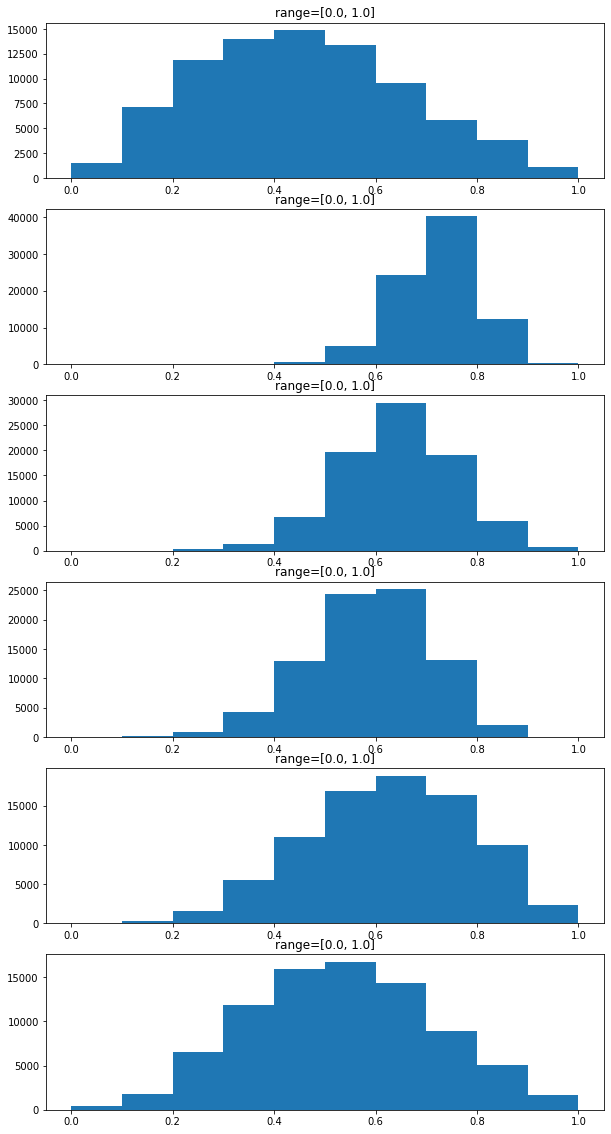

In [104]:
fig, axs = plt.subplots(6,1, figsize=(10,20))
for i in range(6):
    ax = axs[i]
    x = X[:,i]
    ax.hist(x)
    ax.set_title(f"range=[{np.min(x)}, {np.max(x)}]")

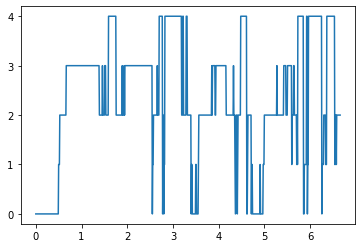

In [17]:
N = 800
dt = np.linspace(0, (N-1)*30/3600, N)
plt.plot(dt, Y[:N])
_ = plt.yticks(np.unique(Y[:N]))

In [129]:
Ntotal = X.shape[0]
Ntrain = int(Ntotal*0.3)
Ntest = Ntotal-Ntrain

idxs = np.arange(Ntotal)
np.random.shuffle(idxs)

Xd, Yd = X[idxs], Y[idxs]

Xtrain = Xd[:Ntrain]
Ytrain = Yd[:Ntrain]
Xtest = Xd[Ntrain:Ntrain+Ntest]
Ytest = Yd[Ntrain:Ntrain+Ntest]

clf = SVC()
clf.fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
train_acc = np.mean(ypred == Ytrain)
ypred = clf.predict(Xtest)
test_acc = np.mean(ypred == Ytest)
print(train_acc)
print(test_acc)

0.6736635093915556
0.6750490212941621


In [111]:
Ntotal = X.shape[0]
Ntrain = int(Ntotal*0.8)
Ntest = Ntotal-Ntrain

idxs = np.arange(Ntotal)
np.random.shuffle(idxs)

Xd, Yd = X[idxs], Y[idxs]

Xtrain = Xd[:Ntrain]
Ytrain = Yd[:Ntrain]
Xtest = Xd[Ntrain:Ntrain+Ntest]
Ytest = Yd[Ntrain:Ntrain+Ntest]

clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=200)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
train_acc = np.mean(ypred == Ytrain)
ypred = clf.predict(Xtest)
test_acc = np.mean(ypred == Ytest)

print(train_acc)
print(test_acc)

0.7024818265280014
0.6906266931551381


In [123]:
Ntotal = X.shape[0]
Ntrain = int(Ntotal*0.8)
Ntest = Ntotal-Ntrain

idxs = np.arange(Ntotal)
np.random.shuffle(idxs)

Xd, Yd = X[idxs], Y[idxs]

Xtrain = Xd[:Ntrain]
Ytrain = Yd[:Ntrain]
Xtest = Xd[Ntrain:Ntrain+Ntest]
Ytest = Yd[Ntrain:Ntrain+Ntest]

clf = LogisticRegression(max_iter=1000)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)

ypred = clf.predict(Xtrain)
train_acc = np.mean(ypred == Ytrain)
ypred = clf.predict(Xtest)
test_acc = np.mean(ypred == Ytest)

print(train_acc)
print(test_acc)

0.6809596195235014
0.6800915056288002


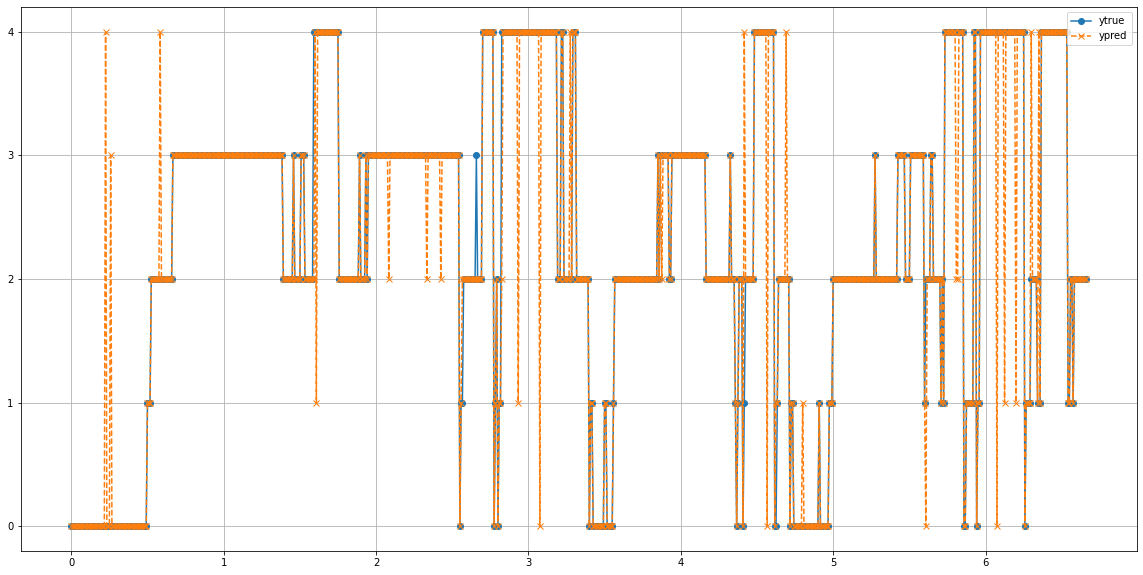

In [109]:
N = 800
dt = np.linspace(0, (N-1)*30/3600, N)

fig = plt.figure(figsize=(20,10))
plt.plot(dt, Y[:N], marker="o", label="ytrue")
plt.plot(dt, clf.predict(X[:N]), linestyle="--", marker="x", label="ypred")
_ = plt.yticks(np.unique(Y[:N]))
plt.grid(True)
plt.legend()